 # Linear Algebra Project
 # Amirreza Mohseni

# First Section: Intro to Numpy

First we initialize matrices A, B, and C
Then in the next following lines we generate the expected results using numpy and python functions

In [18]:
import numpy as np

A = np.array([[1, 1, 1], [2, 2, 2], [1, 1, 1]])
B = np.array([[3, 3, 3], [2, 2, 2], [3, 3, 3]])
C = np.array([[5, 5, 5], [2, 2, 2], [5, 5, 5]])

Sum = A + B + C
print("Sum of A + B + C is equal to:")
print(Sum)

print("A times B is equal to:")
print(np.dot(A, B))

print("Element product of A and C is equal to:")
print(A * C)

A_p = A + 3
print("The result of A + 3 is:")
print(A_p)

A is:
[[1 1 1]
 [2 2 2]
 [1 1 1]]
B is:
[[3 3 3]
 [2 2 2]
 [3 3 3]]
C is:
[[5 5 5]
 [2 2 2]
 [5 5 5]]
Sum of A + B + C is equal to:
[[9 9 9]
 [6 6 6]
 [9 9 9]]
A times B is equal to:
[[ 8  8  8]
 [16 16 16]
 [ 8  8  8]]
Element product of A and C is equal to:
[[5 5 5]
 [4 4 4]
 [5 5 5]]
The result of A + 3 is:
[[4 4 4]
 [5 5 5]
 [4 4 4]]


We expected to recieve an error, however we got an output which was A + (3 * [[1, 1, 1], [1, 1, 1], [1, 1, 1]])

In [15]:
ident = np.identity(3)
print("Element product of B and a 3x3 identity matrix is:")
print(B * ident)

Element product of B and a 3x3 identity matrix is:
[[3. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


In [21]:
all_five = np.full((3, 3), 5, dtype=int)

print("The product of C and the all fives matrix is:")
print(C.dot(all_five))

The product of C and the all fives matrix is:
[[75 75 75]
 [30 30 30]
 [75 75 75]]


In [23]:
print("The transpose of A is:")
print(A.transpose())
A_t = A.transpose()

print("The transpose of B is:")
print(B.transpose())
B_t = B.transpose()

print("The transpose of C is:")
print(C.transpose())
C_t = C.transpose()

The transpose of A is:
[[1 2 1]
 [1 2 1]
 [1 2 1]]
The transpose of B is:
[[3 2 3]
 [3 2 3]
 [3 2 3]]
The transpose of C is:
[[5 2 5]
 [5 2 5]
 [5 2 5]]


In [24]:
print("The element product of A, B, and C transposed is:")
print(A_t * B_t * C_t)

The element product of A, B, and C transposed is:
[[15  8 15]
 [15  8 15]
 [15  8 15]]


In [120]:
def cramer_equation_method(n, equations):
    A = []
    B = []
    for i in range(n):
        all_numbers = list(map(float, equations[i]))
        A.append(all_numbers[:-1])
        B.append([all_numbers[-1]])
    A = np.array(A)
    B = np.array(B)
    det_A = np.linalg.det(A)
    A_t = A.transpose()
    if det_A == 0:
        print("The determinant of A is 0")
        return
    X = []
    for i in range(n):
        mat = np.array(A_t)
        mat[i] = B.transpose()
        mat = mat.transpose()
        X.append(np.linalg.det(mat) / det_A)
    return X

In [121]:
import re

print("Enter the number of variables: ")
n = int(input())
equations = []

for i in range(n):
    equation = input().replace(" ", "")
    equation = re.findall(r'[-+]?(?:\d*\.*\d+)', equation)
    equations.append(equation)

X = np.array(cramer_equation_method(n, equations))
print("X is:")
print(X.transpose())

Enter the number of variables: 
3
1a + 2b + 3c = 10
-5a -6b + 4.5c = 20
1.5a + 2b - 11c = 9
X is:
[-32.30588235  22.77647059  -1.08235294]


# Last Section: PCA Algorithm

In this part, we first try to implement the PCA algorithm and use it on a dataset in the sklearn.datasets library.
After implementing our PCA Algorithm, we will use the builtin function for PCA and try to compare it with our own results.

(569, 2)


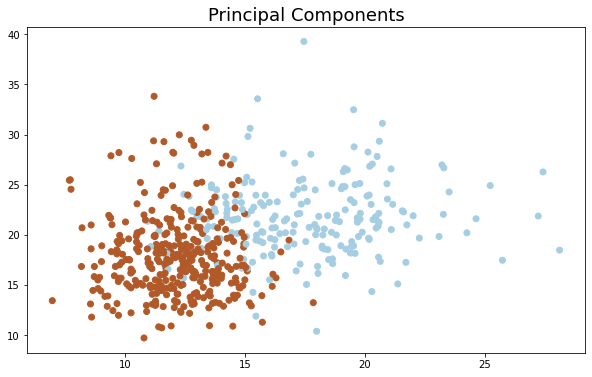

In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Create a classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4)
#Train the classifier
clf.fit(X_train, y_train)


#Read the data
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
#Normalize
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
#Apply PCA 
pca = PCA(n_components = 2).fit(X_normalized)
pca_X = pca.transform(X_normalized)

print(pca_X.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')



Using the PCA process we converted a 30 feature dataset into a 2 feature dataset. As shown in the graph above these new features are still distinguishable(brown data from light blue data).

Now we try to implement out own PCA process and try to compare it with this. 
In order to implement the PCA algorithm we first need to find the Mean of the data that we have and create a matrice B which is the original data minus the Mean.
After creating the matrix B, we create matrix S which is 1/(N - 1) times the BB^T

In [28]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

import numpy as np

X, y = load_breast_cancer(return_X_y = True)

X = np.array(X)
X_meaned = X - np.mean(X, axis=0)

cov_mat = np.cov(X_meaned , rowvar = False)

#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

#sort the eigenvalues and eigenvectors
sorted_index = np.argsort(eigen_values)[::-1] 
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced.shape)

(569, 2)


Here since S is symmetric, we can decompose S using the PDp^T method. Therefore, S = PDp^T and now we can use this equation and write it as D = P^T.S.P and since the eigenvalues remain the same, we only need to take the top eigenvalues to cover nearly all the covariance we need. And we use the top 2 eigenvalues.

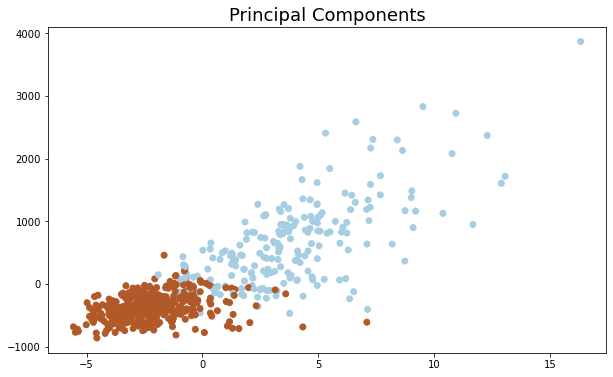

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.title("Principal Components", fontsize=18)
plt.scatter(pca_X[:,0], X_reduced[:,0], c=y, cmap='Paired')

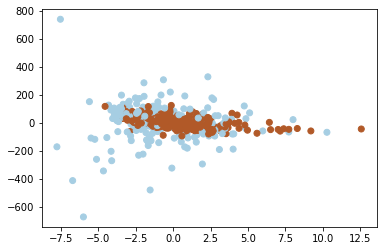

In [34]:
plt.scatter(pca_X[:,1], X_reduced[:,1], c=y, cmap='Paired')

As seen in the results, our pca results are quite close to the sklearn.decomposition PCA.